# Dicoding Submission: Belajar Machine Learning Untuk Pemula
---
## Biodata
#### Nama: Adithya Firmansyah Putra
#### Email: aditputrafirmansyah@gmail.com
#### No. Telp: 081289798423
---




Check Tensorflow Version

In [65]:
import tensorflow as tf

print(tf.__version__)

2.4.1


Mendapatkan Dataset rockpaperscissors.zip

In [67]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-09 01:02:15--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M   564KB/s    in 5m 6s   

2021-05-09 01:07:23 (1.01 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Ekstrak Zip File

In [68]:
import zipfile, os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, mode='r')
zip_ref.extractall('/tmp')
zip_ref.close()

Membuat folder train & validation

In [69]:
base_dir = '/tmp/rockpaperscissors'

# path for train & validation
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# create folder train & validation
os.mkdir(train_dir)
os.mkdir(val_dir)

Membuat path folder gunting, kertas, dan batu

In [70]:
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

Membuat path folder train & validation untuk gunting, kertas, dan batu

In [71]:
# Train Path
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

# Validation Path
val_rock_dir = os.path.join(val_dir, 'rock')
val_paper_dir = os.path.join(val_dir, 'paper')
val_scissors_dir = os.path.join(val_dir, 'scissors')

Membuat folder gunting, kertas, dan batu berdasarkan path yang telah dibuat

In [72]:
# Train folder
os.mkdir(train_rock_dir)
os.mkdir(train_paper_dir)
os.mkdir(train_scissors_dir)

# Validation folder
os.mkdir(val_rock_dir)
os.mkdir(val_paper_dir)
os.mkdir(val_scissors_dir)

Membagi train set dan validation set dengan ukuran 60% untuk train set, 40% untuk validation set

In [73]:
from sklearn.model_selection import train_test_split

# separate train and validation set using [train_test_split]
train_rock, val_rock = train_test_split(os.listdir(rock_dir), test_size=0.4)
train_paper, val_paper = train_test_split(os.listdir(paper_dir), test_size=0.4)
train_scissors, val_scissors = train_test_split(os.listdir(scissors_dir), test_size=0.4)

Menyalin gambar dari dataset yang telah terbagi, kedalam setiap folder train & validation

In [74]:
import shutil

# Loop train set for copy data to separate folder (train) using [shutil]
for img in train_rock:
  shutil.copy(os.path.join(rock_dir, img), os.path.join(train_rock_dir, img))
  
for img in train_paper:
  shutil.copy(os.path.join(paper_dir, img), os.path.join(train_paper_dir, img))
  
for img in train_scissors:
  shutil.copy(os.path.join(scissors_dir, img), os.path.join(train_scissors_dir, img))
  
# Loop validation set for copy data to separate folder (validation) using [shutil] 
for img in val_rock:
  shutil.copy(os.path.join(rock_dir, img), os.path.join(val_rock_dir, img))
  
for img in val_paper:
  shutil.copy(os.path.join(paper_dir, img), os.path.join(val_paper_dir, img))
  
for img in val_scissors:
  shutil.copy(os.path.join(scissors_dir, img), os.path.join(val_scissors_dir, img))

Augmentasi gambar dengan ImageDataGenerator

In [75]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentation Image with [ImageDataGenerator] for train datagen
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True, 
                                   shear_range=0.2, 
                                   fill_mode='nearest')

# Augmentation Image with [ImageDataGenerator] for validation datagen
val_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True, 
                                   shear_range=0.2, 
                                   fill_mode='nearest')

Mempersiapkan data latih yang akan dipelajari oleh model

In [76]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(val_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


Menggunakan Model Sequential untuk membangun arsitektur sebuah CNN

In [77]:
layers = tf.keras.layers

model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation= 'relu', input_shape = (150,150,3)),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(512,activation= 'relu'),
      tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 36992)            

Memanggil fungsi `compile()` pada `model` untuk menentukan loss dan optimizer

In [78]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

Memulai Pelatihan model, beserta melakukan callbaks

In [79]:
callbacks = tf.keras.callbacks.ModelCheckpoint(filepath='model.h5', verbose=1, save_best_only=True)

history = model.fit (
    train_generator,
    steps_per_epoch = 41,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27,
    verbose = 2,
    callbacks = [callbacks]
)

Epoch 1/20
41/41 - 71s - loss: 1.1067 - accuracy: 0.5023 - val_loss: 0.7762 - val_accuracy: 0.6713

Epoch 00001: val_loss improved from inf to 0.77617, saving model to model.h5
Epoch 2/20
41/41 - 70s - loss: 0.5719 - accuracy: 0.7843 - val_loss: 0.3292 - val_accuracy: 0.8900

Epoch 00002: val_loss improved from 0.77617 to 0.32917, saving model to model.h5
Epoch 3/20
41/41 - 70s - loss: 0.3049 - accuracy: 0.8925 - val_loss: 0.4059 - val_accuracy: 0.8530

Epoch 00003: val_loss did not improve from 0.32917
Epoch 4/20
41/41 - 69s - loss: 0.2655 - accuracy: 0.9093 - val_loss: 0.1859 - val_accuracy: 0.9433

Epoch 00004: val_loss improved from 0.32917 to 0.18590, saving model to model.h5
Epoch 5/20
41/41 - 69s - loss: 0.1862 - accuracy: 0.9352 - val_loss: 0.1351 - val_accuracy: 0.9606

Epoch 00005: val_loss improved from 0.18590 to 0.13514, saving model to model.h5
Epoch 6/20
41/41 - 69s - loss: 0.1315 - accuracy: 0.9558 - val_loss: 0.1146 - val_accuracy: 0.9688

Epoch 00006: val_loss improve

Membuat Grafik untuk Train Accuracy dan Validation Accuracy

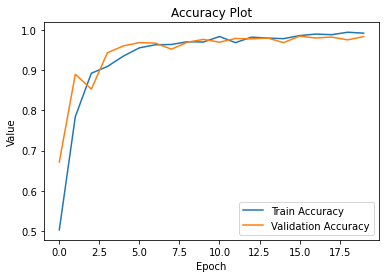

In [80]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

Membuat Grafik untuk Training loss dan Validation loss

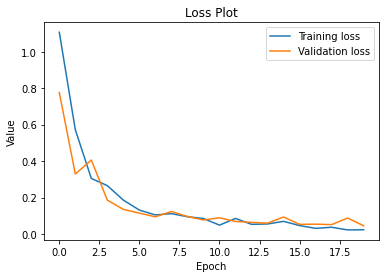

In [81]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label ='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Membuat Colab bisa mengambil Gambar secara langsung

Saving batu.png to batu.png
batu.png
batu


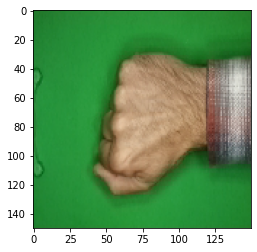

In [83]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for file_myimage in uploaded.keys():

  path = file_myimage
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images= np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(file_myimage)
  if classes[0,0] !=0:
    print('kertas')
  elif classes[0,1] !=0:
    print('batu')
  else:
    print('gunting')